# **Info**

* https://www.youtube.com/watch?v=7J3mz9LMjqg&t=5s
* https://www.kaggle.com/datasets/shwetabh123/mall-customers

# **Setup**

In [26]:
!python3 --version

from psutil import *
print(f'CPU Core Count: {cpu_count()}')
print(f'System RAM: {virtual_memory()[0]//(1024**3)} GB')

Python 3.11.4
CPU Core Count: 8
System RAM: 8 GB


In [51]:
import os
from zipfile import ZipFile
from IPython.display import clear_output

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# **Data Import**

In [28]:
! kaggle datasets download -d shwetabh123/mall-customers

mall-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
# Read Zip File
Zip_File = ZipFile('mall-customers.zip')

print('No. Of File Found: ',len(Zip_File.namelist()))
print('Files Found: ','\n',Zip_File.namelist())

# Extract Files
for file in Zip_File.namelist():
    file_content = Zip_File.read(file)
    with open(os.path.basename(file), "wb") as f:
                f.write(file_content)

No. Of File Found:  1
Files Found:  
 ['Mall_Customers.csv']


In [30]:
df = pd.read_csv('Mall_Customers.csv')

print(df.shape)
df.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.rename({'Genre':'Gender','Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Data Exploration**

In [33]:
# Value Counts Of Gender Column
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Axes: >

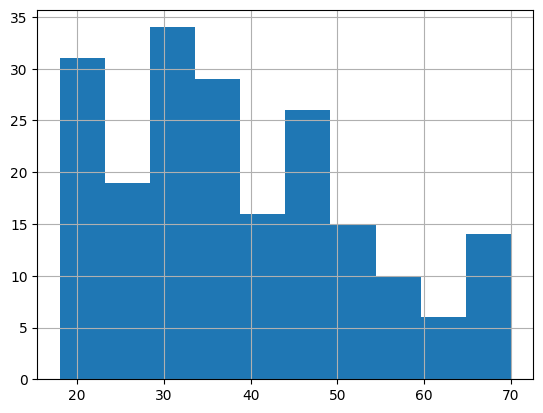

In [34]:
# Histogram Of Age
df['Age'].hist()

<Axes: >

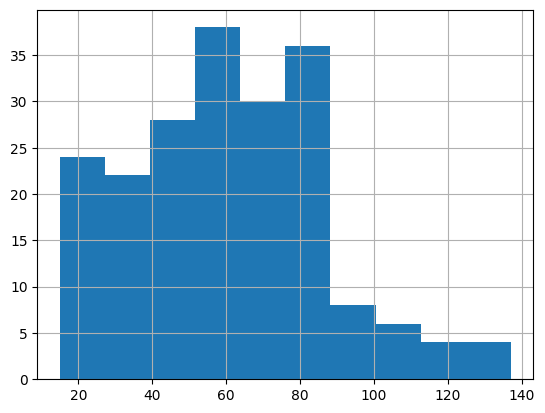

In [35]:
# Histogram Of Annual Income
df['Annual_Income'].hist()

In [40]:
# Boxplot Of Gender & Age
px.box(df,x='Age',y='Gender')

In [38]:
# Boxplot Of Gender & Annual Income
px.box(df,x='Annual_Income',y='Gender')

In [39]:
# Boxplot Of Gender & Spending Score
px.box(df,x='Spending_Score',y='Gender')

In [44]:
# Scatterplot Of Age & Annual Income
px.scatter(df,x='Age',y='Annual_Income')

In [59]:
# Scatterplot Of Age & Annual Income
px.scatter(df,y='Spending_Score',x='Annual_Income')

<Axes: >

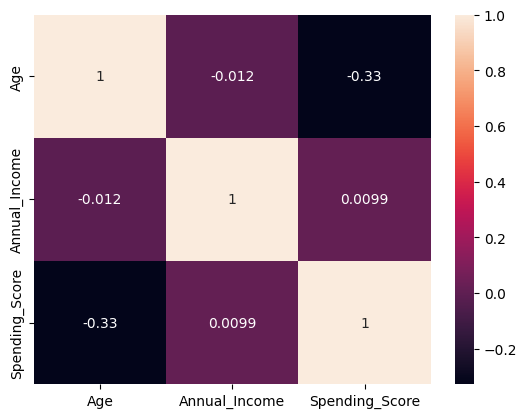

In [47]:
# Correlation Matrix
sns.heatmap(df.loc[:,['Age','Annual_Income','Spending_Score']].corr(),annot=True)

# **Data Processing**

In [103]:
X = df.loc[:,['Annual_Income','Spending_Score']]

## **Elbow Plot**

In [52]:
from sklearn.cluster import KMeans 

# WCSS = Within Cluster Sum Of Squred Distance
WCSS = []

In [53]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

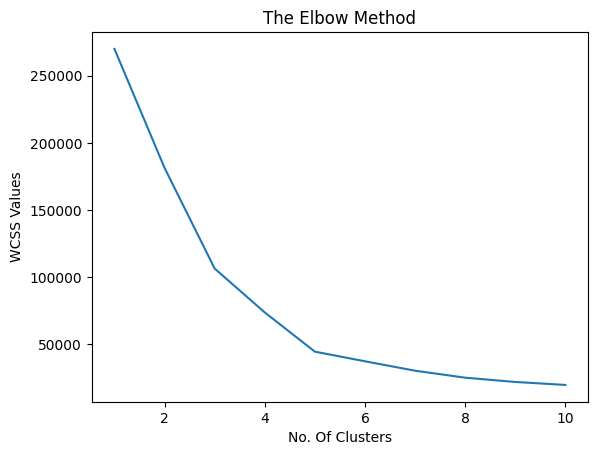

In [54]:
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS Values')
plt.show()

# **Model**

In [57]:
model_01 = KMeans(n_clusters=5,init='k-means++',random_state=0)

# Predict
y_pred_01 = model_01.fit_predict(X) 

In [61]:
print(y_pred_01.shape)
y_pred_01

(200,)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [105]:
X[y_pred_01 == 0].loc[:,'Annual_Income']

43     39
46     40
47     40
48     40
49     40
       ..
121    67
122    69
126    71
132    72
142    76
Name: Annual_Income, Length: 81, dtype: int64

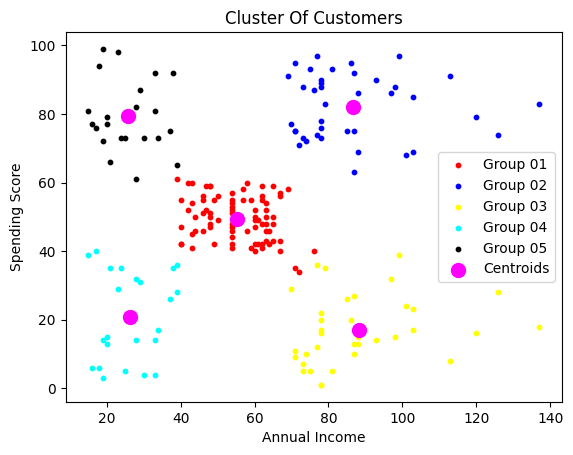

In [109]:
plt.scatter(X[y_pred_01 == 0].loc[:,'Annual_Income'],X[y_pred_01 == 0].loc[:,'Spending_Score'],s=10,c='red',label='Group 01')
plt.scatter(X[y_pred_01 == 1].loc[:,'Annual_Income'],X[y_pred_01 == 1].loc[:,'Spending_Score'],s=10,c='blue',label='Group 02')
plt.scatter(X[y_pred_01 == 2].loc[:,'Annual_Income'],X[y_pred_01 == 2].loc[:,'Spending_Score'],s=10,c='yellow',label='Group 03')
plt.scatter(X[y_pred_01 == 3].loc[:,'Annual_Income'],X[y_pred_01 == 3].loc[:,'Spending_Score'],s=10,c='cyan',label='Group 04')
plt.scatter(X[y_pred_01 == 4].loc[:,'Annual_Income'],X[y_pred_01 == 4].loc[:,'Spending_Score'],s=10,c='black',label='Group 05')

plt.scatter(model_01.cluster_centers_[:,0],model_01.cluster_centers_[:,1],s=100,c='magenta',label='Centroids')
plt.title('Cluster Of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()